<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/02_data_types_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Statistics/data/yellow_tripdata_2021-05.parquet"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
taxi = pd.read_parquet(path, engine='auto', columns=['tpep_pickup_datetime'], storage_options=None, use_nullable_dtypes=False)
taxi = taxi.query("tpep_pickup_datetime >= '2021-05-02' and tpep_pickup_datetime < '2021-05-30'")

In [ ]:
cat_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cat_weekdays, ordered=True)
taxi['dayofweek'] = taxi['tpep_pickup_datetime'].dt.day_name().astype(cat_type)

In [ ]:
taxi = taxi.groupby(['dayofweek'], as_index=False).count()
taxi

,dayofweek,tpep_pickup_datetime
0,Monday,305151
1,Tuesday,337849
2,Wednesday,357989
3,Thursday,356155
4,Friday,367757
5,Saturday,327191
6,Sunday,263298


In [ ]:
taxi.rename(columns={'tpep_pickup_datetime': 'count'}, inplace=True)
taxi.set_index('dayofweek', inplace=True)

In [ ]:
taxi

,count
dayofweek,
Monday,305151
Tuesday,337849
Wednesday,357989
Thursday,356155
Friday,367757
Saturday,327191
Sunday,263298


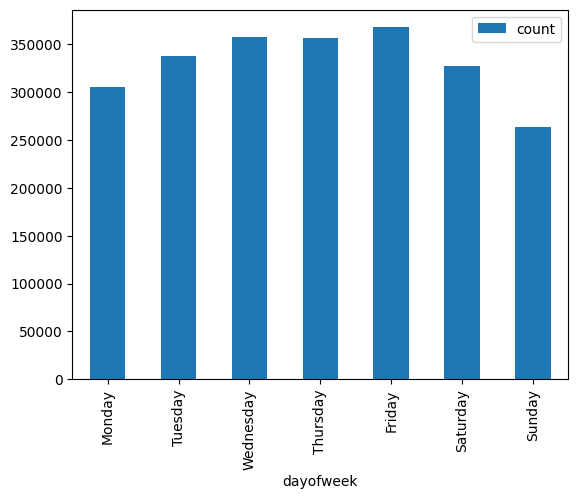

In [ ]:
taxi.plot.bar(y='count')
plt.show()

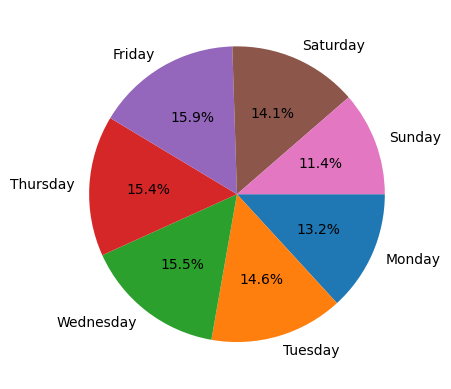

In [ ]:
taxi.plot.pie(y='count', counterclock=False, autopct='%1.1f%%', legend=False)
plt.ylabel('')
plt.show()

            count  cummulative_percent
dayofweek                             
Friday     367757            15.883156
Wednesday  357989            31.344439
Thursday   356155            46.726513
Tuesday    337849            61.317964
Saturday   327191            75.449104
Monday     305151            88.628352
Sunday     263298           100.000000


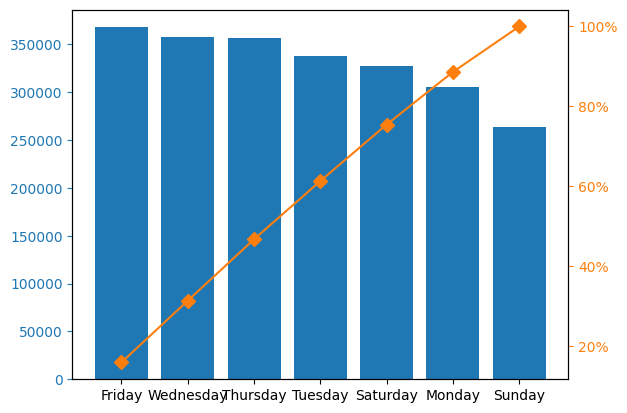

In [ ]:
taxi.sort_values(by='count', ascending=False, inplace=True)
taxi["cummulative_percent"] = taxi["count"].cumsum()/taxi["count"].sum()*100

print(taxi)

fig, ax = plt.subplots()
ax.bar(taxi.index, taxi["count"], color="C0")
ax2 = ax.twinx()
ax2.plot(taxi.index, taxi["cummulative_percent"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()